### randomforest

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
import numpy as np
from collections import Counter

pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

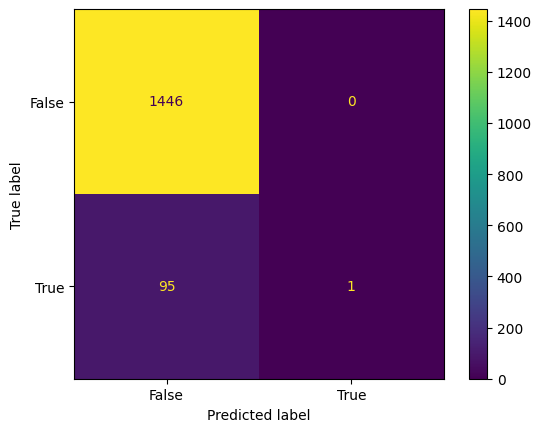

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


In [5]:
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred)

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


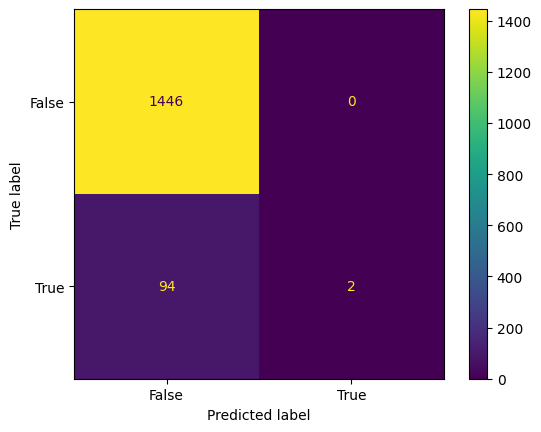

Accuracy: 0.9390402075226978
Precision: 1.0
Recall: 0.020833333333333332
Specificity: 1.0
F1_score: 0.04081632653061225


In [11]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

### with sampling

Counter({0: 724, 1: 724})
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


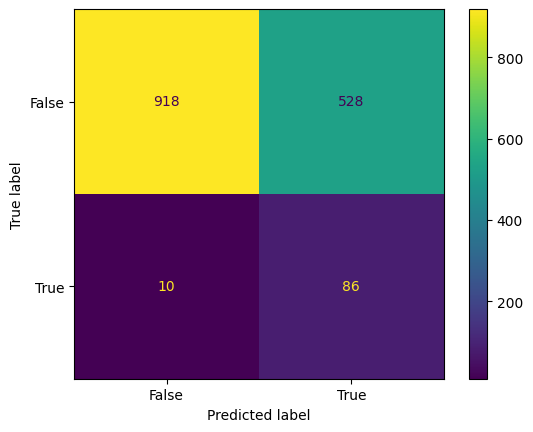

Accuracy: 0.6511024643320363
Precision: 0.14006514657980457
Recall: 0.8958333333333334
Specificity: 0.6348547717842323
F1_score: 0.24225352112676057


In [16]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

X_new, y_new = undersample(X_train, y_train)
print(Counter(y_new))
rand_search.fit(X_new, y_new)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

Counter({1: 11611, 0: 11611})
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 90, 'bootstrap': False}


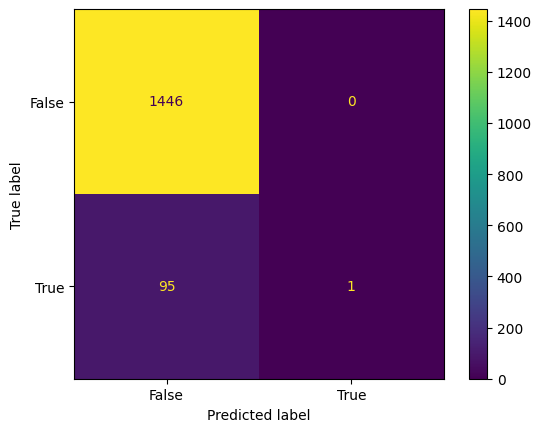

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


In [17]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

X_new, y_new = oversample(X_train, y_train)
print(Counter(y_new))
rand_search.fit(X_new, y_new)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

## sampling methods

### random sampling

In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority')
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_under, y_under = undersample.fit_resample(X_train, y_train)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 87}


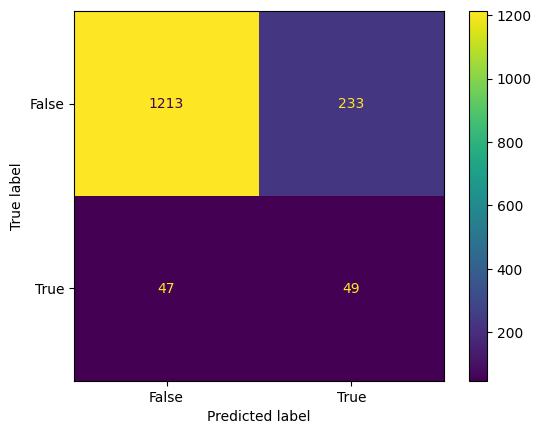

Accuracy: 0.8184176394293126
Precision: 0.17375886524822695
Recall: 0.5104166666666666
Specificity: 0.838865836791148
F1_score: 0.2592592592592593


In [19]:
param_dist = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_over, y_over)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

Best hyperparameters: {'max_depth': 12, 'n_estimators': 131}


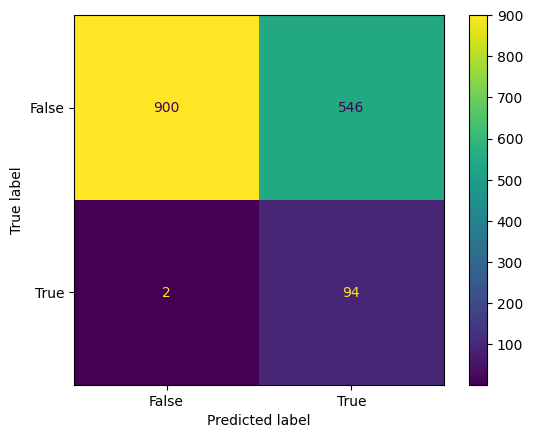

Accuracy: 0.6446173800259404
Precision: 0.146875
Recall: 0.9791666666666666
Specificity: 0.6224066390041494
F1_score: 0.2554347826086957


In [7]:
param_dist = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_under, y_under)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

### smote

In [9]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

Best hyperparameters: {'max_depth': 17, 'n_estimators': 317}


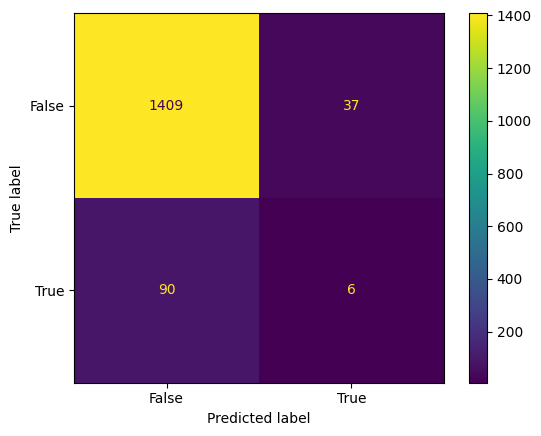

Accuracy: 0.917639429312581
Precision: 0.13953488372093023
Recall: 0.0625
Specificity: 0.9744121715076072
F1_score: 0.08633093525179857


In [10]:
param_dist = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_smote, y_smote)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

### neighbourhood cleaning

In [16]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
y_copy = y_train.copy()
y_copy = y_copy.replace("Yes", 1)
y_copy = y_copy.replace("No", 0)
X_ncr, y_ncr = undersample.fit_resample(X_train, y_copy)
y_ncr = y_ncr.replace(1, "Yes")
y_ncr = y_ncr.replace(0, "No")

Best hyperparameters: {'max_depth': 17, 'n_estimators': 82}


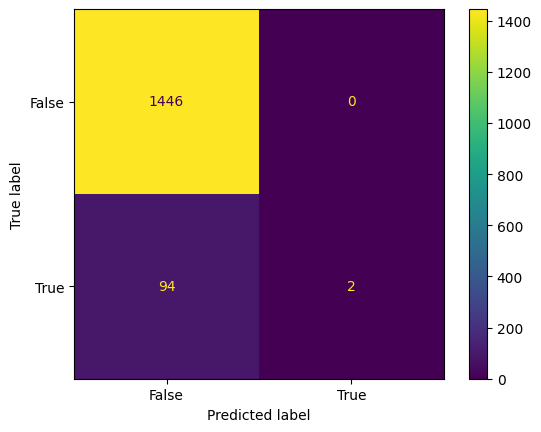

Accuracy: 0.9390402075226978
Precision: 1.0
Recall: 0.020833333333333332
Specificity: 1.0
F1_score: 0.04081632653061225


In [17]:
param_dist = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_ncr, y_ncr)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val)
show_metrics(y_val, y_pred)

## with feature selection and sampling

31
Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehicleCategory_Sedan', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange-Claim',
       'NumberOfCars', 'Year', 'BasePolicy_Liability',
       'BasePolicy_All Perils'],
      dtype='object')
Best hyperparameters: {'n_estimators': 100, 'max_leaf_nodes': 9, 'max_features': 'log2', 'max_depth': 3}


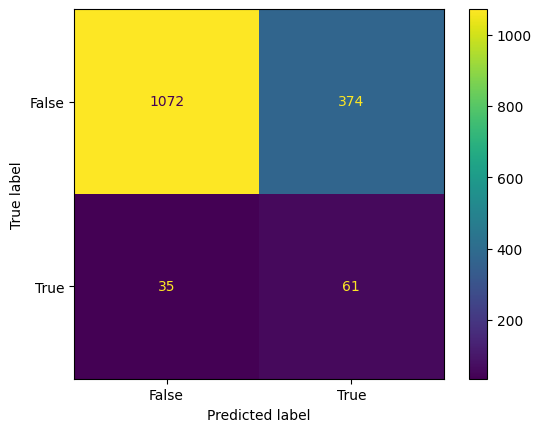

Accuracy: 0.7347600518806745
Precision: 0.14022988505747128
Recall: 0.6354166666666666
Specificity: 0.7413554633471646
F1_score: 0.2297551789077213


In [3]:
from imblearn.over_sampling import SMOTE
from feature_selection import rf_select

features = rf_select(X_train, y_train)
X_train = X_train[features]
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
param_dist = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_smote, y_smote)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val[features])
show_metrics(y_val, y_pred)

31
Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehicleCategory_Sport', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange-Claim',
       'NumberOfCars', 'Year', 'BasePolicy_Liability',
       'BasePolicy_All Perils'],
      dtype='object')
Best hyperparameters: {'n_estimators': 50, 'max_leaf_nodes': 6, 'max_features': None, 'max_depth': 9}


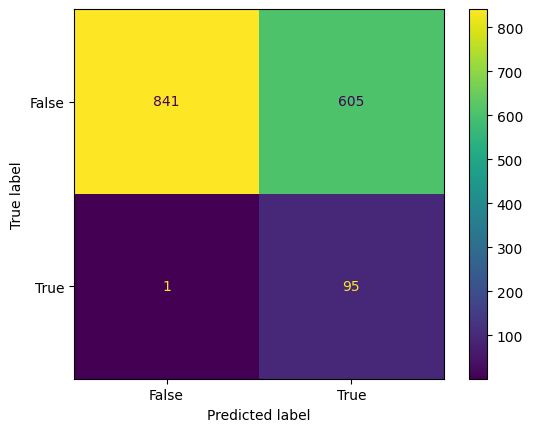

Accuracy: 0.6070038910505836
Precision: 0.1357142857142857
Recall: 0.9895833333333334
Specificity: 0.5816044260027663
F1_score: 0.2386934673366834


In [9]:
from imblearn.under_sampling import RandomUnderSampler

features = rf_select(X_train, y_train)
X_train = X_train[features]
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

param_dist = {
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9]}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_under, y_under)
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

y_pred = best_rf.predict(X_val[features])
show_metrics(y_val, y_pred)